# Overview


We will kick things off with an **in class** lecture on few more administrative things
* Groups
* The large-scale structure of the class
   * Networks and NLP
   * Exercises versus Assignments
   * The final project
* Other stuff (when lectures will be posted, etc)

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend showing up in class!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

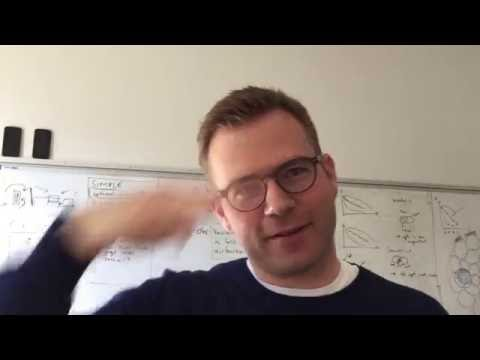

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("MMziC5xktHs",width=800, height=450) 
# Or use https://www.youtube.com/watch?v=MMziC5xktHs if the video isn't displaying

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can find the whole 
> thing for free [**here**](http://networksciencebook.com). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.

<div class="alert alert-block alert-info">
Just as last week, you might be tempted to use an LLM to come up with your answer. Don't! Remember what I said about the *illusion of knowledge* that you get when you take shortcuts. Don't fall into the trap. Think! Write down your own thoughts. And when you're done, you can use an LLM to make the answers better.
</div>


## Answers

### Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?

A friend group. 
- This will not be sparse because they are all friend with each other. 

- If we look at a friend network then it will be sparse because the friends know other friends, but not necessary know all friends in the network. 

You’re partly right, but let me clarify it more carefully.

**Key idea:**
Whether a network is sparse does *not* depend on whether each node has “many” connections in absolute terms. It depends on how the number of links $L$ compares to the maximum possible $L\_{\max} = \tfrac{N(N-1)}{2}$.

* In a **small friend group** where *everyone knows everyone*, the network is a **complete graph**. That’s *not sparse* because $L = L\_{\max}$.

* In a **large social network** (say, Facebook), each person may have hundreds or even thousands of friends. That *sounds* like a lot, but $N$ (the total number of people) is in the billions.

  * The maximum number of possible connections is on the order of $N^2$.
  * Each person’s degree $k\_i$ stays relatively small compared to $N$.
  * So $L$ grows like $O(N)$, while $L\_{\max}$ grows like $O(N^2)$.
  * That means $L \ll L\_{\max}$, so the network is still **sparse**.

**Conclusion:**
Yes, even if each node has “many” connections, the network can still be sparse *if $N$ is very large*, because “many” is tiny compared to $N-1$, the maximum possible neighbors.

Would you like me to rewrite your answer into a **short polished Markdown block** (like a model exam response) so it’s precise and clear?

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book **using `NetworkX`**

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

<div class="alert alert-block alert-info">
The "no-LLM" idea also applies here. The idea is to try to use NetworkX to solve some problems. Give it a shot on your own. You can ask your LLM for hints if you get stuck. But don't ask for the answer. Find it yourself 😎
</div>

## Answers

#### Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 

<img src="SymPyBilleder/2025-09-10-12-35-51.png" width="350">\
Images 2.19

##### Königsberg Problem 
- Which of the icons in Image 2.19 can be drawn without raising yourpencil from the paper, and without drawing any line more than once? Why?

<img src="SymPyBilleder/2025-09-10-12-45-23.png" width="450">

There must only be max 2 node that have a odd number of edges before it can be solved. 

If we are looking at **a)** we see that $1$ and $4$ have $3$ edges which is even, and $2$ and $3$ have $2$ edges which is odd. This means that **a)** **can be solved**. 

If we are looking at **b)** we see that all of them have $3$ edges whihc is odd, and therefore it **cannot be solved**

If we are looking at **c)** we see that $1, 2, 8, 5, 11$ and $12$ have 2 edges which is 6 with even numbers. $4, 3, 6, 9, 7, 10$ all have 4 edges which is even. This one **can be solved**, because all of them are even, and there is now even numbers with edges. 

If we are looking at **d)** we see that $1$ has $1$ edge, $2$ has $3$ edges, $3$ and $4$ have both $6$ edges, and $5$ and $6$ both have $2$ edges. Therefore **d)** **can be solved**, because there is no more than $2$ odd number of edges.

#### Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).

##### Graph Representation
- The adjacency matrix is a useful graph representation for many analytical calculations. However, when we need to store a network in a computer, we can save computer memory by offering the list of links in a Lx2 matrix, whose rows contain the starting and end point i and j of each link. Construct for the networks (a) and (b) in Imade 2.20:

<img src="SymPyBilleder/2025-09-10-12-53-37.png" width="550">

**Graph Representation**

##### Undirected graph of 6 nodes and 7 links.

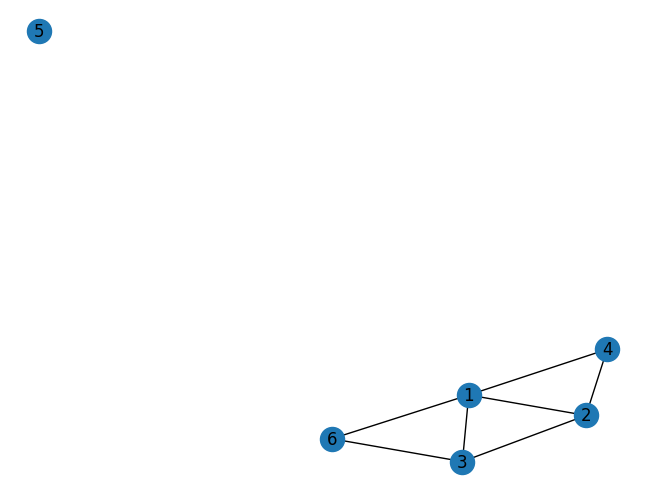

In [ ]:
import networkx as nx

a = nx.Graph()
a_edges = [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
a.add_edges_from(a_edges) # Adding edges which is not connected
a.add_node(5) # Node 5 is not connected to any other node
nx.draw(a, with_labels=True)

##### Directed graph of 6 nodes and 8 directed links.

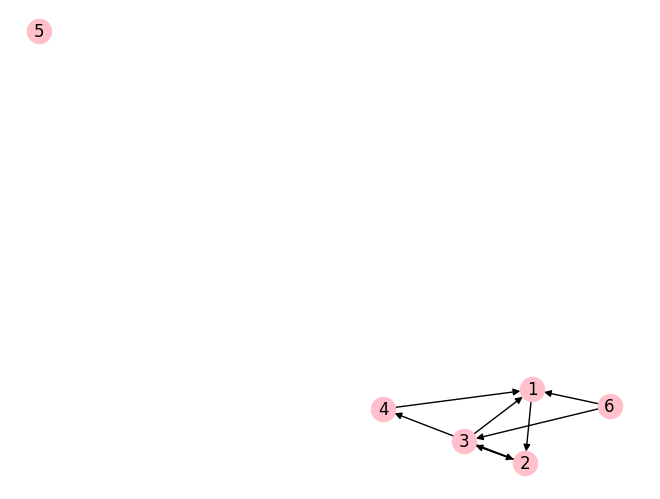

In [ ]:
b = nx.DiGraph()
b_edges = [(1,2), (2,3), (2,4), (3,1), (3,2), (4,1), (6,1), (6,3)]
b.add_edges_from(b_edges)
b.add_node(5)
nx.draw(b, with_labels=True, node_color='pink')

##### The corresponding adjacency matrices.

$$
(a) = \begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 1 \\
1 & 0 & 1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 1 \\
1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 \end{bmatrix}
$$

$$
(b) = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 \end{bmatrix}
$$

In [ ]:
nx.adjacency_matrix(a).todense()

array([[0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
nx.adjacency_matrix(b).todense()

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

##### The corresponding link lists.

In [ ]:
a.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)])

In [ ]:
for u, v in a.edges():
    print(f"{u} -- {v}")

1 -- 2
1 -- 3
1 -- 4
1 -- 6
2 -- 3
2 -- 4
3 -- 6


In [ ]:
b.edges()

OutEdgeView([(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)])

In [ ]:
for u, v in sorted(b.edges()):
    print(f"{u} -- {v}")

1 -- 2
2 -- 3
2 -- 4
3 -- 1
3 -- 2
4 -- 1
6 -- 1
6 -- 3


##### Determine the average clustering coefficient of the network shown in Image 2.20a

The probability of a chosen node neighbors being connected. 

In [ ]:
print(f"Average Clustering Coeffient: {nx.average_clustering(a)}")
print(f"Average Clustering Coeffient: {nx.average_clustering(b)}")

Average Clustering Coeffient: 0.6388888888888888
Average Clustering Coeffient: 0.32222222222222224


##### If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?

In [ ]:
a = nx.Graph()
a_edges = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]
a.add_edges_from(a_edges) # Adding edges which is not connected
a.add_node(6) # Node 5 is not connected to any other node

b = nx.DiGraph()
b_edges = [(1,2), (2,3), (2,4), (3,1), (3,2), (4,1), (5,1), (5,3)]
b.add_edges_from(b_edges)
b.add_node(6)

In [ ]:
nx.adjacency_matrix(a).todense()

array([[0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
nx.adjacency_matrix(b).todense()

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

It will not changes if we do it with the code. The reason why is that the code switch node $5$ and $6$. So, the code take the unconnected node to the end. If we do it by hand, that the adjecency matrix will change. 

##### What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

We can not see in the link list the weights of the edges. We will see the weights of the edges in out adjecency matrix. 

##### In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

<img src="SymPyBilleder/2025-09-10-13-42-44.png" width="250">

If we need to start in 1 and have the length 3 and end in node 3, then we see that we have 3 possible ways to do that in graph $a$. 

We can go from:\
$1 \rightarrow 6 \rightarrow 1 \rightarrow 3$\
$1 \rightarrow 2 \rightarrow 1 \rightarrow 3$\
$1 \rightarrow 4 \rightarrow 2 \rightarrow 3$

<img src="SymPyBilleder/2025-09-10-13-48-21.png" width="250">\
if we look at graph $b$, we see that we have no possible ways, because we can not forfill the condition of length 3. 


##### With the help of a computer, count the number of cycles of length 4 in both networks.

#### Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks). 
- *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

<img src="SymPyBilleder/2025-09-10-13-51-19.png" width="350">\
Images 2.1

##### Consider the bipartite network of Image 2.21

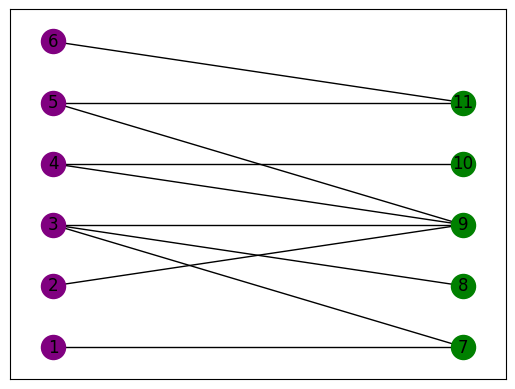

In [ ]:
import matplotlib.pyplot as plt

N = nx.Graph()
a = [1, 2, 3, 4, 5, 6]
b = [7, 8, 9, 10, 11]
N.add_nodes_from(a, bipartite=0) # Add the node attribute "bipartite"
N.add_nodes_from(b, bipartite=1)

a_edges_list = [(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)]
N.add_edges_from(a_edges_list)

l, r = nx.bipartite.sets(N) 
pos = {}

# Update position for node from each group 
pos.update((node, (1, index)) for index, node in enumerate(l)) # put nodes from X at x=1
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw_networkx_nodes(N, pos, nodelist=l, node_color="purple", label="Set A")
# Draw right set in another color
nx.draw_networkx_nodes(N, pos, nodelist=r, node_color="green", label="Set B")
# Draw edges + labels
nx.draw_networkx_edges(N, pos)
nx.draw_networkx_labels(N, pos)

plt.show()

##### Construct its adjacency matrix. Why is it a block-diagonal matrix?

In [ ]:
nx.adjacency_matrix(N).todense()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

Because it is anti-block diagonal matrix is because the purple is only connected with the green, and other way around. The purple are not connected with the purple and the same for the green they are neither connected with each other. 

##### Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

In [ ]:
A = nx.projected_graph(N, a)
B = nx.projected_graph(N, b)

nx.adjacency_matrix(A).todense()

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [ ]:
nx.adjacency_matrix(B).todense()

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

If they are projected connected, this means that in the adjacency matrix it will look like that 1 and 3 have a connection, because it runs though 7. 

##### Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

In [ ]:
# Can find the averge degree, so we do it manually, and sum over the degrees and divide by the number of nodes
A_sum = sum(dict(A.degree()).values())
B_sum = sum(dict(B.degree()).values())

A_avg = A_sum / nx.number_of_nodes(A)
B_avg = B_sum / nx.number_of_nodes(B)

print(f"Average degree of purple nodes: {A_avg}")
print(f"Average degree of green nodes: {B_avg}")

Average degree of purple nodes: 2.6666666666666665
Average degree of green nodes: 2.0


In [ ]:
A.nodes(), A.edges()

(NodeView((1, 2, 3, 4, 5, 6)),
 EdgeView([(1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5), (5, 6)]))

In [ ]:
B.nodes(), B.edges()

(NodeView((7, 8, 9, 10, 11)),
 EdgeView([(7, 8), (7, 9), (8, 9), (9, 10), (9, 11)]))

##### Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?

In [ ]:
# Average degree of each projected graph
purple = nx.Graph(N.edges(nbunch=a))
green = nx.Graph(N.edges(nbunch=b))

# Can find the averge degree, so we do it manually, and sum over the degrees and divide by the number of nodes
A_sum = sum(dict(purple.degree()).values())
B_sum = sum(dict(green.degree()).values())

A_avg = A_sum / nx.number_of_nodes(purple)
B_avg = B_sum / nx.number_of_nodes(green)

print(f"Average degree of purple nodes: {A_avg}")
print(f"Average degree of green nodes: {B_avg}")

Average degree of purple nodes: 1.8181818181818181
Average degree of green nodes: 1.8181818181818181


My answer:

The reason why we get a higher averages degree of the bipartite network, is because the only constrain is that the node exist and the reason why we get a lower averages degree of the projected network is because the constrains is that the purple nodes isn't connected to the green nodes but also the purple nodes. 

Chat answer, based on my answer:

The average degree is higher in the bipartite network because edges form whenever a purple node connects to a green node. In the projected network, edges only appear when two purple nodes share a green neighbor, which is a stricter condition and therefore lowers the average degree.

#

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

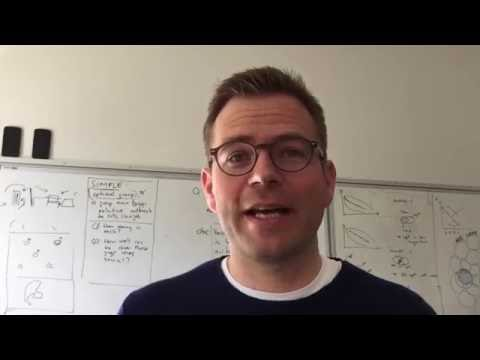

In [5]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450) 
# https://www.youtube.com/watch?v=iDlb9On_TDQ

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.

<div class="alert alert-block alert-info">
As I hint right above, this exercise is about you discovering nuances of binning: How defining bins that fit the data is important. How the first and last bin can sometimes be tricky. You won't discover that if you get help, so again I encourage you to try it all on your own.
</div>
**And don't just use the built-in binning functions. That misses the point. Instead follow the exercise carefully**. 

> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

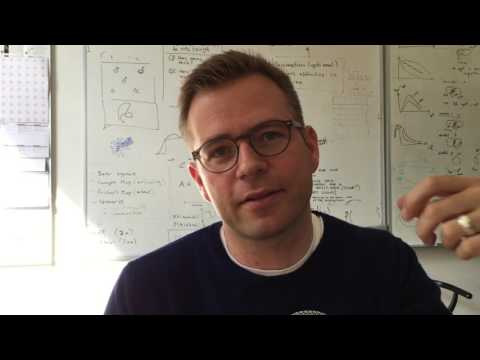

In [4]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450) 
# https://www.youtube.com/watch?v=c_SbQCzgqb0

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

<div class="alert alert-block alert-info">
For this exercise, I think you should solve the technical parts on your own (see above for reasons), but it's totally OK to use your LLM to make the plot look better!
</div>

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)